In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import numpy as np

In [1]:
pwd

'/content'

In [ ]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[0].shape     #each sample is a 28x28 matrice that represent the number 

(28, 28)

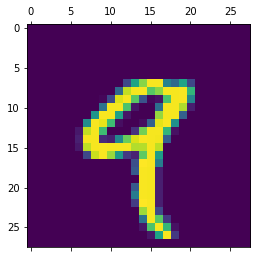

In [ ]:
plt.matshow(x_train[4])

In [ ]:
x_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
#we have to scale the input in order to acheive higher accuracy
#all the samples in the array are between 0 & 255, 255 is highest 
#so to scale - we devide both x_train and x_test by 255

x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
#flattening the 28x28 array to feed it into the neural network with each pixel corresponding to one neuron

x_train_flat = x_train.reshape(len(x_train), 28*28)
x_test_flat = x_test.reshape(len(x_test), 28*28)

x_train_flat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(x_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2685 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1176 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0822 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0627 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0501 - accuracy: 0.9847


In [ ]:
model.fit(x_train_flat, y_train, epochs=5) #number of iterations of neural network

Epoch 1/5


ValueError: ignored

In [ ]:
#testing

model.evaluate(x_test_flat , y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2709 - accuracy: 0.9241


[0.27092763781547546, 0.9240999817848206]

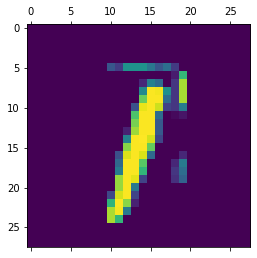

In [ ]:
plt.matshow(x_train[67])

In [ ]:
y_predicted = model.predict(x_test_flat)
y_predicted[67]   #the prediction prints 10 outputs representing the last layer of neurons from 0-9 

array([1.3719797e-02, 2.1877664e-05, 1.4530420e-02, 1.5285611e-04,
       9.9809879e-01, 1.9642711e-03, 1.9183812e-01, 9.3170553e-02,
       1.0299480e-01, 3.7129411e-01], dtype=float32)

In [ ]:
#finding the larget value in the predicted array and printing the result

np.argmax(y_predicted[67]) 

4

In [ ]:
#saving the largest value from each prediction into a new array so that it represents the truth or actual data (basically the value that it predicted)
#doing this because we cannot pass y_predicted because it contains value for all cases, we just need the biggest value out of those, which is the actual prediction

y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels ) #labels is basically truth 
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 948,    0,    1,    2,    0,   11,   11,    3,    3,    1],
       [   0, 1107,    3,    2,    1,    1,    4,    2,   15,    0],
       [   3,    9,  926,   16,    9,    6,   13,   11,   36,    3],
       [   2,    0,   18,  913,    0,   31,    3,   13,   23,    7],
       [   1,    1,    3,    1,  927,    0,   11,    5,   11,   22],
       [   7,    2,    3,   28,   10,  790,   17,    7,   23,    5],
       [   7,    3,    5,    1,    7,   13,  919,    2,    1,    0],
       [   1,    5,   25,    3,    8,    0,    0,  966,    3,   17],
       [   5,    7,    7,   18,    9,   36,    9,   13,  865,    5],
       [   8,    7,    1,   10,   46,   11,    0,   38,    8,  880]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

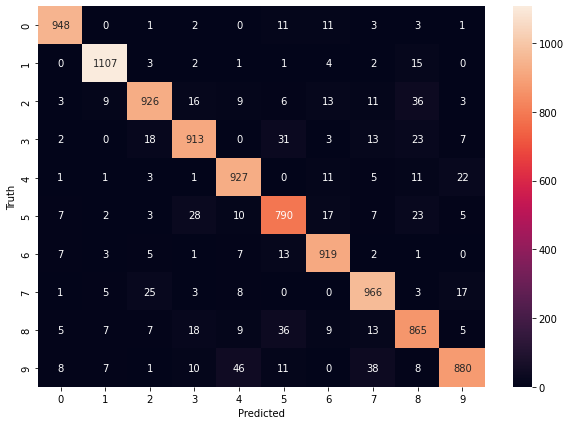

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#creating hidden layer
#alternate way of flattening using keras(easier)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)   #using only x_train not flattened

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2831 - accuracy: 0.9190
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1312 - accuracy: 0.9617
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0913 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0703 - accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0551 - accuracy: 0.9834


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0790 - accuracy: 0.9761


[0.07899869978427887, 0.9761000275611877]